# ITBW51 Text & Social Analytics Project

## Data Understanding & Data Preparation. v.2.0

___

**Module Group**: *ITBW51-01*

**Group Name**: *Anyhow*

**Tutor**: *Ms Jane Zhang*

**By**: *Zhang Xiang*
___

### **Project Title**: *Suitable Job Classifier*


### Project Summary:

**Dataset**: Our team scraped data from 4 different recruitment websites (JobStreet, Indeed, Glassdoor, and LinkedIn) to facilitate job candidates in finding an ideal job based on their qualifications.

**Objective**: To ***recommend the most ideal job related to a candidate's skills and qualifications.*** The project will only be attempted if a single label classification approach is successfully completed and if there is enough time available.

**Goal**: Build multi-class classification to predict job roles such as Data Analyst, Data Scientist, Software Engineer, and Business Analyst by analyzing job description texts. 

**Code Amendment (version 2):**
- Decide to not conduct splitting of join words E.g. "JoinWord"
- Add additional bag of stop words to remove high frequency words occur like "s" and "use"
- Decide to use the Spelling Error Removal Section code.

Justifications on amendment are stated in modelling and evaluation.

## Download & Import necessary libraries
~~~Python
!pip install contractions
!pip install langid
!pip install ftfy
!pip install pyspellchecker
~~~

In [1]:
# !pip install contractions
# !pip install langid
# !pip install ftfy
# !pip install pyspellchecker

In [2]:
import nltk
nltk.download('all')

import re
import string
import contractions
import langid
import ftfy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Zhang Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Zhang Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Zhang Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to C:\Users\Zhang
[nltk_data]    |     Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\Zhang Xiang\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    |

In [3]:
# Read csv using Pandas
df = pd.read_csv('Dataset/raw_data.csv')
df.shape

(12947, 5)

In [4]:
# Show full data view
# pd.set_option('display.max_colwidth', None)

In [5]:
# View first 2 rows
df.head(2)

,Role,Company,Title,Link,Description
0,Business Analyst,Equinix,Business Analysis Advisor,https://www.glassdoor.sg/partner/jobListing.ht...,Business Analysis Advisor\n\nWho are we?\n\nEq...
1,Business Analyst,NCS,Data Analyst (Fusion Poly Graduate Programme),https://www.glassdoor.sg/partner/jobListing.ht...,WILL YOU BE PART OF THE EXTRAORDINARY?\n\nWe'r...


## Data Understanding

### Considerations:

1. Understand the **Data Type & Columns**.
    - Understanding the data types of the columns can assist in identifying any potential errors or issues in the format of the data.
    - Being familiar with the variables and their meanings to help in identifying missing or unnecessary data in the dataset.


2. Check for **Missing/Null Values**.
    - It is essential to be aware of the amount of missing data and how to handle it, as it can potentially introduce bias or inaccuracies.


3. Check for **Duplicate Data**
    - Duplicate data is important to identify and remove, any wrong information that might skew the results of the analysis. Having duplicate data can cause issues such as:
        - Biased results/Confusion: Frequency of certain values, which can lead to biased results in statistical analysis and machine learning models.
        - Inefficiency: Increase the size of the dataset, which affect the processing time.
        

4. Check for **Outliers**.        
   - Looking for outliers in the dataset. Outliers can be caused by errors in data collection or measurement, and should be take care appropriately. There are several reasons to check for outliers:
        - Inaccurate predictions: Outliers can cause a negative impact on the accuracy of predictions made by machine learning models.
        - Data Quality: Handling outliers can improve the overall quality of the data and ensure that the analysis is based on valid and accurate observations.        


5. **Identify unecessary columns to remove** for NLP sentiment analysis.
    - Require 2 columns: Role and Description.
    - Efficiency: Reduce code runtime.


6. **Evaluate the balance of the data / Data Distribution**.
    - Data balancing can have a significant impact on the performance of machine learning models with an unbalance data. Consequences as below:
        - Bias: Unbalanced data can result in a bias during machine learning model training, as the model will be mainly exposed to the majority class, leading to poor prediction of the minority class.
        - Overfitting: Unbalanced data can also lead to overfitting the model, where the model performs well on the training data but poorly on unseen data.

### Overview of Data Type and Columns

1. **Data Type of each Column**
    - ***Role*** : object (String)
    - ***Company*** : object
    - ***Title*** : object
    - ***Link*** : object
    - ***Description*** : object


2. **Column Information**
    
    - ***Role*** : Job Category => Target Variable
    - ***Company*** : Job Posting Company
    - ***Title*** : Job Title on Job Posting
    - ***Link*** : Link to scrape each row of description 
    - ***Description*** : Review given by customer. (Feature Selected)
        
        > Description contain:
        > - Decoding / Encoding Error by UTF-8 during scraping. (E.g. accentureâ\x80\x99s, abilityâ\x80¢)
        >> Above uses the library: ftfy
        >> ~~~Python
        >> import ftfy
        >> result = ftfy.fix_text(doc)
        >> ~~~
        > - "\n" that represent next line.
        > - URL (http://...)
        > - Email (info@_.com)
        > - Found Emoji/Icon (E.g. 😊, ➤)
        > - Multiple words joining in one. (E.g. rectificationConfigure, recommendationsProviding )
        > - Phone Number (this will be removed at the numeric number removal)
        > - Numeric number and numeric number with character.
        >> Above uses the library: re
        >> ~~~Python
        >> import re
        >> ## REGEX
        >> pattern = r""
        >> remove_ = re.sub(pattern, ' ', doc)
        >> ~~~
        > - Different cases (Uses build-in .lower() function)
        > - Contractions
        >> Using the library: contractions
        >> ~~~Python
        >> import contractions
        >> contractions.fix(doc)
        >> ~~~
        > - Punctuation
        >> Using the library: string
        >> ~~~Python
        >> import string
        >> string.punctuation
        >> ~~~
        > - Spelling Error
        >> Using the library: spellchecker
        >> ~~~Python
        >> from spellchecker import SpellChecker
        >> spell = SpellChecker()
        >> ## Add word to ignore removal
        >> spell.word_frequency.load_words([])
        >> ## Identify unknown word
        >> misspelled = spell.unknown(cleaned_arr)
        >> ~~~
        > - Stopwords
        >> Using the library: sklearn
        >> ~~~Python
        >> from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
        >> stopwords = set(ENGLISH_STOP_WORDS)
        >> stopwords.remove('not')
        >> ~~~
        > - Short Term \ Simple Term (E.g.LINUX, UNIX, HTML, CSS, JavaScript)
        > - Multiple Languages
        >> Using the library: langdetect
        >> ~~~Python
        >> import langid
        >> df['Language'] = df['Description'].apply(lambda x: langid.classify(x)[0])
        >> ~~~

In [6]:
# Understand some meta-data about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12947 entries, 0 to 12946
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Role         12947 non-null  object
 1   Company      12935 non-null  object
 2   Title        12947 non-null  object
 3   Link         12947 non-null  object
 4   Description  12947 non-null  object
dtypes: object(5)
memory usage: 505.9+ KB


In [7]:
df.dtypes

Role           object
Company        object
Title          object
Link           object
Description    object
dtype: object

#### Exploration on Description

In [8]:
# Create a temporary dataframe that contain text only.
# Exploration is done through looking at csv file directly as well.
text_exploration = df[['Description']]
text_exploration.head(2)

,Description
0,Business Analysis Advisor\n\nWho are we?\n\nEq...
1,WILL YOU BE PART OF THE EXTRAORDINARY?\n\nWe'r...


In [9]:
## Create a new column that indicates the language
df['Language'] = df['Description'].apply(lambda x: langid.classify(x)[0])

df.head(2)

,Role,Company,Title,Link,Description,Language
0,Business Analyst,Equinix,Business Analysis Advisor,https://www.glassdoor.sg/partner/jobListing.ht...,Business Analysis Advisor\n\nWho are we?\n\nEq...,en
1,Business Analyst,NCS,Data Analyst (Fusion Poly Graduate Programme),https://www.glassdoor.sg/partner/jobListing.ht...,WILL YOU BE PART OF THE EXTRAORDINARY?\n\nWe'r...,en


In [10]:
# Find text that are not written in english.
language_check = df.loc[df['Language'] != 'en']

# Show data
language_check.head(2)

,Role,Company,Title,Link,Description,Language
3357,Software Engineer,SINGAPORE de SHUSHOKU,Software Developer (Junior),https://sg.indeed.com/viewjob?jk=9e9d2754ba14a5a6,勤務先企業概要\n\n\n\n\n\n業種\n\n\n ＩＴ/通信系\n \n\n...,la
4266,Data Scientist,Naval Group,VIE SINGAPOUR - Ingénieur IA-Big Data,https://sg.indeed.com/viewjob?jk=52ba0e50fe977df4,Organisation \nNaval Group compte parmi les ac...,fr


In [11]:
print(f'No.of row with text not written in english:', len(language_check), 'rows')

No.of row with text not written in english: 65 rows


#### Find URL

In [12]:
# Find URL in dataset
# pattern = r'(https?\:.+)|(www\..+)'
pattern = r"https?\S+"
compiled = re.compile(pattern)

url_list = []
for idx in df.index:
    urls = compiled.findall(df['Description'][idx])
    if urls:
        url_list.extend(urls)

print('URL:', len(url_list))
url_list

URL: 932


['https://ocbc.taleo.net/careersection/ocbc_external/jobdetail.ftl?job=',
 'https://www.achievegroup.asia/privacy-policy/',
 'https://aia.wd3.myworkdayjobs.com/amplifyhealthexternal/job/Singapore-SG-Amplify-Health/XMLNAME--Senior--Business-Analyst_JR-33520-1',
 'https://aia.wd3.myworkdayjobs.com/amplifyhealthexternal/job/Singapore-SG-Amplify-Health/XMLNAME--Senior--B',
 'https://www.mlpc.com.sg/job-seeker/',
 'https://ocbc.taleo.net/careersection/jobdetail.ftl?job=2300002Q&lang=en',
 'https://ocbc.taleo.net/careersection/ocbc_external/jobdetail.ftl?job=220002Q2&tz=GMT%2B08%3A00&tzname=Asia%2FSingapore',
 'https://www.manpower.com.sg/privacy-policy',
 'https://ocbc.taleo.net/careersection/ocbc_external/jobdetail.ftl?job=',
 'https://www.manpower.com.sg/privacy-policy',
 'https://ocbc.taleo.net/careersection/ocbc_external/jobdetail.ftl?job=220002Q2&tz=GMT%2B08%3A00&tzname=Asia%2FSingapore',
 'https://www.manpower.com.sg/privacy-policy',
 'https://www.manpower.com.sg/privacy-policy',
 'ht

#### Find Email

In [13]:
# Find email in dataset
email_pattern = r"\S*@\S*\s?"

compiled = re.compile(email_pattern)

email_list = []
for idx in df.index:
    email = compiled.findall(df['Description'][idx])
    if email:
        email_list.extend(email)

print('Email:', len(email_list))
email_list

Email: 1777


['charissaong@recruitexpress.com.sg\n',
 'charissaong@recruitexpress.com.sg\n',
 'charissaong@recruitexpress.com.sg\n',
 'search77@searchindex.com.sg\n',
 'search77@searchindex.com.sg\n',
 'search77@searchindex.com.sg\n',
 'search77@searchindex.com.sg\n',
 'search77@searchindex.com.sg\n',
 'amit.kotian@tangspac.com\n',
 'amit.kotian@tangspac.com\n',
 '@:\n',
 'amit.kotian@tangspac.com\n',
 '@:\n',
 '@ ',
 'careers.sg@aleph-labs.com ',
 'tamanna.bilandi@adecco.com\n',
 '@ ',
 'weisian@itcspl.com, ',
 'hres@itcspl.com\n',
 'charissaong@recruitexpress.com.sg\n',
 'charissaong@recruitexpress.com.sg\n',
 'charissaong@recruitexpress.com.sg\n',
 'search77@searchindex.com.sg\n',
 'search77@searchindex.com.sg\n',
 'search77@searchindex.com.sg\n',
 'charissaong@recruitexpress.com.sg\n',
 'charissaong@recruitexpress.com.sg\n',
 'charissaong@recruitexpress.com.sg\n',
 'search77@searchindex.com.sg\n',
 'search77@searchindex.com.sg\n',
 'search77@searchindex.com.sg\n',
 'charissaong@recruitexpress.c

#### Find Emoji / Icon

In [14]:
emoji_icon_pattern  = r"["u"\U0001F600-\U0001F64F"u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF"u"\U0001F1E0-\U0001F1FF"u"\U00002702-\U000027B0"u"\U000024C2-\U0001F251""]+"
            
compiled = re.compile(emoji_icon_pattern, flags=re.UNICODE)

emoji_icon_list = []
for idx in df.index:
    emoji_icon = compiled.findall(df['Description'][idx])
    if emoji_icon:
        emoji_icon_list.extend(emoji_icon)

print('Emoji/Icon:', len(emoji_icon_list))
emoji_icon_list



Emoji/Icon: 1244


['���',
 '勤務先企業概要',
 '業種',
 'ＩＴ',
 '通信系',
 '求人内容',
 'ポジションタイトル',
 '職種',
 '関連エンジニア',
 'お仕事内容',
 '業務内容詳細',
 '上司',
 '日本人男性',
 '募集背景',
 '増員',
 '勤務条件',
 '勤務時間',
 'オフィスアワー',
 '勤務曜日',
 '月－金',
 '残業',
 'あり',
 '出張',
 'あり（ＡＳＥＡＮエリア）',
 '雇用形態',
 '契約社員',
 '給料',
 '基本給与',
 '有給休暇',
 '日間',
 'メディカルリーブ',
 'その他',
 '募集要項',
 '，',
 '︎',
 '︎',
 '︎',
 '︎',
 '︎',
 '︎',
 '\ufeff',
 '\ufeff',
 '\ufeff',
 '\ufeff',
 '\ufeff',
 '\ufeff',
 '\uf0a7',
 '\uf0a7',
 '\uf0a7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '：',
 '✉️',
 '\ufeff',
 '\ufeff',
 '\ufeff\ufeff',
 '\ufeff\ufeff',
 '\ufeff\ufeff',
 '\ufeff\ufeff',
 '\ufeff\ufeff',
 '\ufeff',
 '\ufeff\ufeff',
 '\ufeff\ufeff',
 '\ufeff\ufeff',
 '➢',
 '➢',
 '➢',
 '➢',
 '✉',
 '️',
 '️',
 '\uf0b7',
 '\uf0b7',
 '\uf0b7',
 '第四范式',
 '️',
 '\ufeff'

#### Find Joining Word => Spelling Error

In [15]:
join_error_pattern = r'\b[a-z]+[A-Z]\w+'

# find pattern of starting with a lowercase letter and ending 
# with an uppercase letter word
compiled = re.compile(join_error_pattern)

join_error_list = []
for idx in df.index:
    join_error = compiled.findall(df['Description'][idx])
    if join_error:
        join_error_list.extend(join_error)

print('Join Error:', len(join_error_list))
join_error_list


#Unable to clean ah

Join Error: 23093


['iOS',
 'iOS',
 'iPhone',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'iOS',
 'iOS',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'eCommerce',
 'disciplinesMinimum',
 'casesHands',
 'regionManage',
 'completenessValidate',
 'offeredReview',
 'costSupport',
 'sourcesSupport',
 'reportsSupport',
 'haveDemonstrate',
 'bonusLocation',
 'eZRx',
 'eZRx',
 'eXperience',
 'ofDeputy',
 'ofDeputy',
 'disciplinesMinimum',
 'casesHands',
 'regionManage',
 'completenessValidate',
 'offeredReview',
 'costSupport',
 'sourcesSupport',
 'reportsSupport',
 'haveDemonstrate',
 'bonusLocation',
 'disciplinesMinimum',
 'casesHands',
 'regionManage',
 'completenessValidate',
 'offeredReview',
 'costSupport',
 'sourcesSupport',
 'reportsSupport',
 'haveDemonstrate',
 'bonusLocation',
 'disciplinesMinimum',
 'casesHands',
 'regionManage',
 'compl

### Check for Missing/Null Value

**Missing/Null** value is found in **Company Column**.
~~~Python
Role                  False
Company                True
Title                 False
Link                  False
Description           False
~~~

In [16]:
df.isna().any()

Role           False
Company         True
Title          False
Link           False
Description    False
Language       False
dtype: bool

In [17]:
df.isna().sum()

Role            0
Company        12
Title           0
Link            0
Description     0
Language        0
dtype: int64

### Check for Duplicate Data

- Exact same row: No Duplicate
- Role,Title, Description: Duplicate Found
- Description:

In [18]:
# It shows that there is no duplicate row. Which mean each row is unique.
print(f"Are there duplicated rows? (Exact Same): {df.duplicated().any()}")

# It shows that there is no duplicate in 'Role','Title', 'Description'.
print(f"Are there duplicated Role, Title, Description?: {df.duplicated(subset = ['Role','Title', 'Description']).any()}")

# It shows that there is duplicated text.
print(f"Are there duplicated Description?: {df.duplicated(subset = ['Description']).any()}")

Are there duplicated rows? (Exact Same): False
Are there duplicated Role, Title, Description?: True
Are there duplicated Description?: True


In [19]:
print(f"Count of duplicated rows (Exact Same): {df.duplicated().sum()}")

print(f"Count of duplicated rows (Role, Title, Description): {df.duplicated(subset = ['Role', 'Title', 'Company', 'Description']).sum()}")

print(f"Count of duplicated rows (Description): {df.duplicated(subset = ['Description']).sum()}")

Count of duplicated rows (Exact Same): 0
Count of duplicated rows (Role, Title, Description): 2333
Count of duplicated rows (Description): 2691


### Check for Outlier - Target Variable

The 4 job roles as shown below are all the jobs that we proposed to classify when the model build to help the IT fresh-grad in finding most suitable job.

No outlier found.

~~~Python
['Business Analyst' 'Data Analyst' 'Software Engineer' 'Data Scientist']
~~~

In [20]:
job_roles = df['Role'].unique()
print(job_roles)

['Business Analyst' 'Data Analyst' 'Software Engineer' 'Data Scientist']


### Identify unecessary columns to remove

To build a machine learning model, it definitely require a predictors and results, so that model can be build to classify the job role.

**Column Required**
- Role (result)
- Description (predictor)

In [21]:
df.head(1)

,Role,Company,Title,Link,Description,Language
0,Business Analyst,Equinix,Business Analysis Advisor,https://www.glassdoor.sg/partner/jobListing.ht...,Business Analysis Advisor\n\nWho are we?\n\nEq...,en


### Evaluate the balance of the data / Data Distribution

As seen from the data it seems quite evenly spreaded, with the biggest different found between **Data Analyst and Software Engineer, with 21.6% and 28.7% respectively, having a different of 7.1% only**. Therefore, I would not perform any oversampling or undersampling techniques to modify the dataset for avoid overfitting and bias situation.

In [22]:
# View the counts of job roles
df['Rating'].value_counts()

Software Engineer    3718
Business Analyst     3321
Data Scientist       3105
Data Analyst         2803
Name: Role, dtype: int64

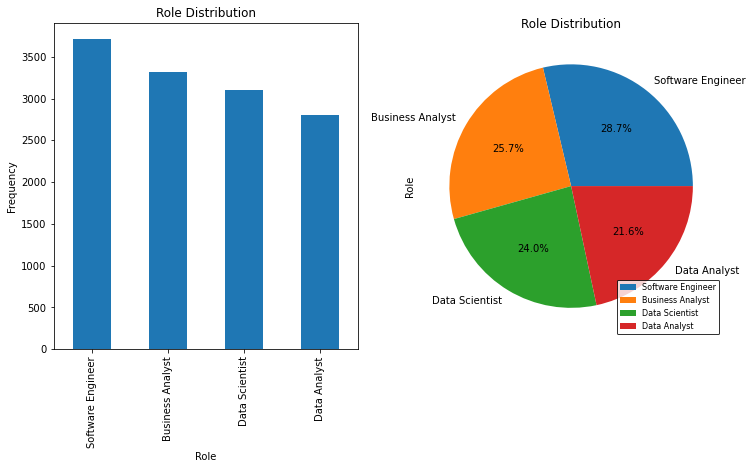

In [23]:
# Create a new figure with 2 subplots
fig, axs = plt.subplots(1,2, figsize=(12,6))

# Count the number of occurrences of each value in the 'stars' column
role_counts = pd.value_counts(df['Role'])

# Plot the bar chart in the first subplot
role_counts.plot.bar(ax=axs[0], title="Role Distribution")

# Plot the counts as a pie chart
role_counts.plot.pie(ax=axs[1], title="Role Distribution", autopct='%1.1f%%')

# Add axis labels
axs[0].set_xlabel("Role")
axs[0].set_ylabel("Frequency")

# Add legends
plt.legend(loc='lower right', fontsize=8, facecolor='white', edgecolor='black',title_fontsize=12)

# Show the chart
plt.show()

## Data Preparation

### Steps:

1. **Remove Non-English Description**
    - With the use of new column 'Language', I have decide to remove entire row of record if it is not written in english. 
    - Example: 'Japan' => 'jp', 'English' => 'en'. 
    - Another option to consider is translating the non-English text into English. This would require more processing time and effort to review the non-english description. Also, we would not know if it translate correctly.
    - Additionally,  non-english description only exist for 67 rows out of the entire dataset (10000+), and removing it likely would not have a significant impact on the final outcome.


2. **Remove Duplicate Description**
    - Keep the last row of duplicate, if duplicate exist in text column and drop the others.


3. **Remove Unwanted Columns**
    - Drop 'Company', 'Title', 'Link' and 'Language'.
    - Only 'Role' & 'Description' will be used.


4. **Data Transformation**
    - Encode Role column.
    - Depends on the models that will be trained if it accept string or only numeric value.
    > | Role | Encoded Value |
    > |----------|-----|
    > | Business Analyst | 1 |
    > | Data Analyst   | 2   |
    > | Software Engineer | 3 |
    > | Data Scientist | 4 |

4. **Data Balancing**

    When working with imbalanced datasets, it is important to balance the classes to ensure that the model is **not biased towards the majority class**.
    
    Data Balancing should also be performed with the split of dataset
    
    How can I sample it?

    > - **Under-sampling**: This method involves removing some of the rows from the majority class to balance the dataset.
    
    > - **Over-sampling**: This method involves adding more rows to the minority class to balance the dataset.

    > - **Synthetic Data Generation**: This method involves generating new samples for the minority class. One popular algorithm for this is the Synthetic Minority Over-sampling Technique (SMOTE).
    
    Will I sample it? **No**
    
    **Justification:**
    - The distribution of Role in the dataset is all range of (21% - 28%), the difference between the distribution is not that significant.
    - I am not performing either undersampling or oversampling.
    - **Undersampling** could lead to lost in important information. (Data is about 10k+, I would not want to reduce the amount of data for my model to learn.)
    - **Oversampling** having a high chance of causing overfitting the model. (Downside of overfitting is that the model will not generalize well to new data, resulting in poor performance on the test set.)
    - Sometime classifiers also train models with data that are not totally balance(50%/50%) do not perform as well on imbalanced data encountered in the real world.
 


5. **Text Pre-Processing**
    
    The steps listed must be done in a sequence.
    > 1. **Encode Text.**
        - Error by UTF-8 during scraping. 
        - From: E.g. accentureâ\x80\x99s, abilityâ\x80¢
        - To: E.g. accenture's, ability
        
    > 2. **Remove "\n" from text.**
        - From: I'll leave.\nI am here again and spent 20dollar.
        - To: I'll leave. I'm here again and spent 20dollar.
        - Non-Word
        - From: I'll leave. I'm here again and spent.
        - To: i'll leave. i'm here again and spent.
        
    > 3. **Remove Emoji Icon**
        - From: Hi😊, Location➤
        - To: Hi, Location
        
    > 4. **Join Word Correction (Not Conducting)**
        - With the checking of join word in the above data understanding, It was found that there are word like IOS, JQuery, postgreSQL, spaCy. This function might affect the result.
        - From: assignedRequirements, recommendationsProviding
        - To: assigned Requirements, recommendations Providing
        
    > 5. **Lowercase**
        - Converting all text to lowercase can help standardize the data and prevent the model from treating words with different capitalization as separate words.
        
    > 6. **Remove URLs, Email**
        - From : Visit http:\/\/www.saleevent.ca\/index.php, email:  info@bohofarmandhome.com. and call us with  ph. 480 893 0465.
        - To: Visit, email:. and call us with ph..
        -Non-Word
        
    > 7. **Remove number & number with word.**
        - From: I'll leave. I'm here again and spent 20dollar.
        - To: I'll leave. I'm here again and spent.
        - Non-Word
        
    > 8. **Expand Contraction.**
        - The use of contractions can make the text less clear, as they can have multiple meanings and can cause confusion or misinterpretation in understanding the text.
        - "I'm" = "I am", if without expanding there will be 3 terms "I'm", "I" and "am" but it mean the same. Which will affect the model.
        - From: i'll leave. i'm here again and spent.
        - To: i will leave. i am here again and spent.
        
    > 9. **Remove Punctuation**
        - From: i will leave. i am here again and spent.
        - To: i will leave i am here again and spent
        
    > 10. **Remove Stop Words**
        - From: i will leave i am here again and spent
        - To: [ leave, here, again, spent ]
        - Spelling errors can negatively impact a model's ability to identify sentiment, as they can cause confusion for the model, leading to incorrect predictions. In datasets with many spelling errors, it may be difficult for the model to correctly identify sentiment.
        - Removal of spelling error will be conducted if the spelling error affect much on the performance of the model through testing.
    
    > 11. **Search for Spelling Error**
        - This function will be looking for english spelling error and update a set with all spelling error for that specific row
        - Example: {dawio}
        
    > 12. **Remove Spelling Error**
        - From: [again, spent, dawio]
        - To: again spent

    **Choose 1 from the 2 methods below**:
    > 13. **Stemming**
        - Reducing a word to its base form by cutting off the suffixes or prefixes
        - From: The runner was running down the street.
        - To: The run was run down the street.
        
    > 14. **Lemmatization** (Choosen)
        - Takes into account the context of the word and reduces it to its base form using a dictionary
        - From: I ate an apple.
        - To: I eat an apple.


6. **Visulisation**
    - Word Cloud - Word Frequency after cleaning
    - Line Graph - Word Frequency after cleaning


7. **Cleaned Dataset**
    - Data that is cleaned is under Lemmatized column
    - Other columns are the process of cleaning
    - Write cleaned csv file

### Remove Non-English Description

In [24]:
df.head(2)
df.shape

(12947, 6)

In [25]:
df = df[df["Language"] == "en"]
df.head(2)

,Role,Company,Title,Link,Description,Language
0,Business Analyst,Equinix,Business Analysis Advisor,https://www.glassdoor.sg/partner/jobListing.ht...,Business Analysis Advisor\n\nWho are we?\n\nEq...,en
1,Business Analyst,NCS,Data Analyst (Fusion Poly Graduate Programme),https://www.glassdoor.sg/partner/jobListing.ht...,WILL YOU BE PART OF THE EXTRAORDINARY?\n\nWe'r...,en


In [26]:
df.shape

(12882, 6)

### Remove Duplicate Description

No Duplicate will be tolerated, choose the optimal count of duplicate from description column only.

In [27]:
print(f"Count of duplicated rows (Description): {df.duplicated(subset = ['Description']).sum()}")

Count of duplicated rows (Description): 2691


In [28]:
df = df.drop_duplicates(subset = ['Description'], keep='last')
df.reset_index(drop=True, inplace=True)
df.head(2)

,Role,Company,Title,Link,Description,Language
0,Business Analyst,TANGSPAC CONSULTING PTE LTD,Business Analyst IT (Non Banking),https://www.glassdoor.sg/partner/jobListing.ht...,Responsibility\n\nPerform research and analysi...,en
1,Business Analyst,Dbs Bank Ltd.,"Analyst, Admin Support, CBG Business Analytics...",https://www.glassdoor.sg/partner/jobListing.ht...,Business Function\nAs the leading bank in Asia...,en


In [29]:
df.shape

(10191, 6)

In [30]:
print(f"Count of duplicated rows (Description): {df.duplicated(subset = ['Description']).sum()}")

Count of duplicated rows (Description): 0


### Remove Unwanted Columns

In [31]:
# Remove unecessary used for analysis
df.drop(columns=['Company', 'Title', 'Link', 'Language'], axis=1, inplace=True)

In [32]:
# Reset index: During testing with smaller sample the index is randomized.
df.reset_index(drop=True, inplace=True)
df.head(2)

,Role,Description
0,Business Analyst,Responsibility\n\nPerform research and analysi...
1,Business Analyst,Business Function\nAs the leading bank in Asia...


### Data Transformation

Depends on the models that will be used in further modelling section

In [33]:
# mapping = {'Business Analyst': 1, 'Data Analyst': 2, 'Software Engineer': 3, 'Data Scientist': 4}

# df['Role'] = df['Role'].map(mapping)

In [34]:
df.head(2)

,Role,Description
0,Business Analyst,Responsibility\n\nPerform research and analysi...
1,Business Analyst,Business Function\nAs the leading bank in Asia...


### Data Balancing

Should be conducted before Text Pre-Processing to avoid bias result in training and testing data

#### Not performing equal data balancing

**Justification:**
- The distribution of Role in the dataset is all range of (21% - 28%), the difference between the distribution is not that significant.


- I am not performing either undersampling or oversampling.
- **Undersampling** could lead to lost in important information. (Data is about 10k+, I would not want to reduce the amount of data for my model to learn.)


- **Oversampling** having a high chance of causing overfitting the model. (Downside of overfitting is that the model will not generalize well to new data, resulting in poor performance on the test set.)


- Sometime classifiers also train models with data that are not totally balance(50%/50%) do not perform as well on imbalanced data encountered in the real world.

### Text Pre-Processing

In [35]:
df.head(3)

,Role,Description
0,Business Analyst,Responsibility\n\nPerform research and analysi...
1,Business Analyst,Business Function\nAs the leading bank in Asia...
2,Business Analyst,Position Summary\n\nYou will be working in a c...


#### Encode Text

In [36]:
def encode_text(doc):
    result = ftfy.fix_text(doc)

    return result

df['encode_text'] = df['Description'].apply(lambda doc:encode_text(doc))

#### Remove "\n"

In [37]:
def remove_BSn(doc):
    # REGEX for "\n" tag
    pattern = r'\n'
    
    # Substitude the pattern with a space ' ' and strip it
    result = re.sub(pattern, ' ', doc).strip()

    return result

df['remove_backSlashN'] = df['encode_text'].apply(lambda doc:remove_BSn(doc))

#### Remove Emoji/Icon 😊

In [38]:
def remove_emoji_icon(doc):
    emoji_icon_pattern  = r"["u"\U0001F600-\U0001F64F"u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF"u"\U0001F1E0-\U0001F1FF"u"\U00002702-\U000027B0"u"\U000024C2-\U0001F251""]+"
    compiled_emoji_icon = re.compile(emoji_icon_pattern, flags=re.UNICODE)
    result = compiled_emoji_icon.sub(' ', doc).strip()
    
    return result

df['remove_emoji_icon'] = df['remove_backSlashN'].apply(lambda doc: remove_emoji_icon(doc))

#### Join Word Correction (Not Conducting)

More join word can be found in spelling search section.

- This function might affect the result, **not sure to perform until further modelling.**
- With the checking of join word in the above data understanding, it was found that there are word like IOS, JQuery, postgreSQL, spaCy.

In [39]:
# This function will not remove all kind of join word.
def correct_JoinWord(doc):
    
    # Find words like "assignedRequirements", "recommendationsProviding"
    join_error_pattern  = r"\b[a-z]+[A-Z]\w+"
    compiled_join_error = re.compile(join_error_pattern)
    join_error_list = compiled_join_error.findall(doc)
    
    # Replace the wrong word
    for joinWord in join_error_list:
        corrected_word = re.sub(r"([a-z])([A-Z])", r"\1 \2", joinWord)
        doc = doc.replace(joinWord, corrected_word)
#    "assignedRequirements", "recommendationsProviding" => "assigned Requirements", "recommendations Providing"
    return doc

# df['correct_JoinWord'] = df['remove_emoji_icon'].apply(lambda doc: correct_JoinWord(doc))

#### Lowercasing

In [40]:
df['lowercase'] = df['remove_emoji_icon'].apply(lambda doc: doc.lower())

#### Remove URL

In [41]:
def remove_url(doc):
    pattern_url = r"https?\S+"
    
    remove_url = re.sub(pattern_url, ' ', doc).strip()
    
    return remove_url.strip()

df['remove_url'] = df['lowercase'].apply(lambda doc: remove_url(doc))

#### Remove Email

In [42]:
def remove_email(doc):
    pattern_email = r"\S*@\S*\s?"
    remove_email = re.sub(pattern_email, ' ', doc)
    
    return remove_email.strip()

df['remove_email'] = df['remove_url'].apply(lambda doc: remove_email(doc))

#### Remove Number / Number + Word

In [43]:
def remove_number_with_word(doc):
    pattern_alphanumic = r"\w*\d\w*"
    remove_alphanumeric = re.sub(pattern_alphanumic, ' ', doc).strip()
    
    return remove_alphanumeric

df['remove_text_number'] = df['remove_email'].apply(lambda doc: remove_number_with_word(doc))

#### Expand Contraction

In [44]:
def expand_contraction(doc):
    
    return contractions.fix(doc)

# Contraction expansion must be conducted before all punctuation is removed.
df['expand_contraction'] = df['remove_text_number'].apply(lambda doc: expand_contraction(doc))

#### Remove Punctuation

In [45]:
def remove_punctuation(doc):
    
    # Some word appear to be joined together like "fault-tolerant", 
    # when only punctuation is removed it output 
    # will be like "faulttolerant", which is spelling error.
    
    # Therefore, when punctutation is found it will be replace by a empty space ' '.
    punctuationfree = "".join( [i if i not in string.punctuation else ' ' for i in doc])
    
    # Return a stripped string without extra empty space
    return punctuationfree.strip()

# Puntuation removal must be conducted after contractions has expanded,
# to avoid making it a spelling error.
df['remove_punctuation'] = df['expand_contraction'].apply(lambda doc:remove_punctuation(doc))

#### Stopwords Removal

In [46]:
# Additional bag of stop words
custom_stopwords = set(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 
                       "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"])

In [47]:
# from nltk.corpus import stopwords： Not that complete
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def remove_stopwords(doc):
    # Create a set of stopwords to remove from description
    stopwords = set(ENGLISH_STOP_WORDS)
    stopwords.update(custom_stopwords)
    stopwords.remove('not')
    
    
    # Tokenize it into individual word.
    tokens = nltk.word_tokenize(doc)
    # Perform check for stopwords
    clean_list = [token for token in tokens if not (token in stopwords)]
    
    return clean_list

df['remove_stopwords'] = df['remove_punctuation'].apply(lambda doc:remove_stopwords(doc))

#### Adjustment Dade: This section will be used for modelling.
____

#### Bag of words for IT

In [48]:
IT_words = ["IT", "software", "hardware", "programming", "coding",
            "developer", "computer", "network", "cybersecurity",
            "IT", "infrastructure", "cloud", "big", "data", "AI",
            "machine", "learning", "web", "development", "app",
            "data", "science", "IT", "service", "management",
            "IT", "project", "management", "IT", "support", "IT",
            "operations", "IT", "governance","Python", "Java", "C++", "C",
            "JavaScript", "JS", "C#", "PHP", "Ruby", "Swift", "Go", "Scala",
            "Kotlin","SQL", "Oracle", "MySQL", "MongoDB", "Cassandra",
            "PostgreSQL", "SQL", "Server","HTML", "CSS", "JavaScript",
            "jQuery", "AngularJS", "ReactJS", "VueJS", "Bootstrap",
            "Semantic","UI","Django", "Flask", "Ruby", "on", "Rails",
            "ExpressJS", "Spring", "Laravel", "Yii","AWS", "Azure",
            "Google", "Cloud", "OpenStack","Hadoop", "Spark", "Storm",
            "Hive", "Pig", "Kafka","Git","GitHub", "Jenkins", "Ansible", "Docker",
            "Kubernetes", "Terraform","Scrum", "Kanban", "XP", "Lean",
            "Jira", "Trello", "Asana", "Basecamp","ITIL", "COBIT","Linux",
            "Windows", "Unix","Firewall", "intrusion", "detection",
            "penetration", "testing", "vulnerability", "assessment", "Agile","Algorithm","Analytics","API","Automation","Backend","Bigdata","Business",
             "Caching","Clustering","Communication","Computer","Concurrency","Data","Database",
             "DataMining","DataScience","DataStructures","Debugging","DeepLearning","Design",
             "Development","Distributed","Efficiency","Engineering","Ensemble","Evaluation",
             "Exploration","Feature","Finance","Frontend","Fullstack","Functional","Gradient",
             "Hadoop","Hyperparameter","Implementation","Information","Innovation","Insights",
             "Integration","Intelligence","Keras","Leadership","Linear","Machine","Mapping",
             "Mathematics","Model","Modeling","Neural","Optimization","Performance","Perl",
             "Php","Predictive","Processing","Product","Programming","Python","Quality",
             "R","Reinforcement","Reliability","Research","Resilience","Scala","Scaling",
             "Scientific","Security","Sensitivity","Service","Software","Sql","Statistical",
             "Strategy","Structures","Support","Svm","System","Tensorflow","Testing","Text",
             "Time","Tools","Topology","Transfer","Understand","Visualization","Web", "WindowOS", "macOS", "OS", "KPI", "IOS", "PowerBI"]

# Prevent repeat words and lowercase it.
IT_words_set = set([word.lower() for word in IT_words])
IT_words = list(IT_words_set)

#### Search for Spelling Error

In [49]:
from spellchecker import SpellChecker

spell = SpellChecker() # the default is English (language='en')
# Add words that are in specific term, to prevent removal.
spell.word_frequency.load_words(IT_words)

# Search spelling error by refering to the library dictionary
def spelling_checker(cleaned_arr):
    
    # Find unknown word from a list of words and create a Set()
    misspelled = spell.unknown(cleaned_arr)
    
    return misspelled

# Create a set of wrong spelling word that are not in dictionary of SpellChecker.
df['wrong_spelling'] = df['remove_stopwords'].apply(lambda arr:spelling_checker(arr))

#### Gather all Spelling Error

In [50]:
# Adding all words with spelling error
wrong_spelling = set()
for i in df.index:
    wrong_spelling.update(df['wrong_spelling'][i])
    
print(sorted(wrong_spelling))
print()
print(f'There are {len(wrong_spelling)} unique misspelled words found.')

['aa', 'aaa', 'aaai', 'aacsb', 'aad', 'aagv', 'aaic', 'aam', 'aanleiding', 'aaron', 'aas', 'aassist', 'aat', 'aatm', 'aav', 'abap', 'abaqus', 'abaxx', 'abb', 'abeam', 'abhishek', 'abie', 'abilitiesa', 'abilitiesbasic', 'abilitiescomfort', 'abilitiesdetail', 'abilitiesea', 'abilitiesenjoy', 'abilitiesexcellent', 'abilitiesexperience', 'abilitiesextremely', 'abilitiesinquisitive', 'abilitiesproficient', 'abilities·', 'abilities•', 'abilitydynamic', 'abilityinterested', 'abilitymeticulous', 'abilityother', 'abilitypossess', 'abilitystrong', 'abilitytiktok', 'abilitywe', 'abilitywilling', 'ability•', 'abiliy', 'abillion', 'abled', 'ableness', 'ablity', 'abllity', 'ablo', 'abm', 'abnormalityperform', 'abnormity', 'abor', 'aboutcrafting', 'aboveadvanced', 'aboveat', 'aboved', 'abovedeep', 'abovefamiliarity', 'abovegood', 'abovementioned', 'abovemust', 'aboveprocure', 'abovespring', 'abovethis', 'abovevisual', 'abp', 'abr', 'abroadknowledge', 'abroad•', 'absorbance', 'abstracting', 'abstractl

#### Remove Spelling Error (Conducted)

In [51]:
df['deep_spelling_cleansing'] = df['remove_stopwords'].apply(lambda x: [word for word in x if word not in wrong_spelling])


___

#### Lemmatization with POS

In [52]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def lemmatizing(cleaned_arr):
    lemmatizer = WordNetLemmatizer()
    
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
        
    pos_tagged = nltk.pos_tag(cleaned_arr)
    
    # wordnet_tagged return something like [('wanted', 'v'), ('love', 'n'), ('even', 'r')]
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as it is
            lemmatized_sentence.append(word)
        else:       
            # else use the tag to lemmatize the token to lemmatize the matched tagging with the word
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)

    return lemmatized_sentence

# Some words like "mixed" adjective seems like unable to be lemmatized with nltk.
df['lemmatized'] = df['deep_spelling_cleansing'].apply(lambda arr: lemmatizing(arr))

#### Compare Length of words Before / After

In [53]:
df['len_before_cleaning'] = df['Description'].apply(lambda doc: len(nltk.word_tokenize(doc)))

df['len_after_cleaning'] = df['lemmatized'].apply(lambda doc: len(nltk.word_tokenize(doc)))

In [54]:
print("Total Length Before Cleaning: ", df['len_before_cleaning'].sum())
print("Total length After Cleaning ", df['len_after_cleaning'].sum())

Total Length Before Cleaning:  4085776
Total length After Cleaning  2025498


### Visualisation

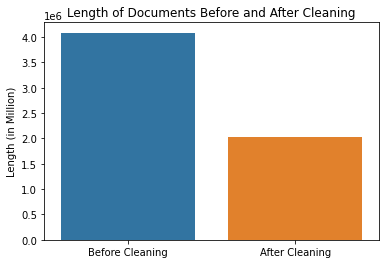

In [55]:
sns.barplot(x=['Before Cleaning','After Cleaning'], y=[df['len_before_cleaning'].sum(), df['len_after_cleaning'].sum()])
plt.ylabel('Length (in Million)')
plt.title('Length of Documents Before and After Cleaning')
plt.show()

#### Word Cloud + Line Graph

Color found in: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [56]:
from wordcloud import WordCloud

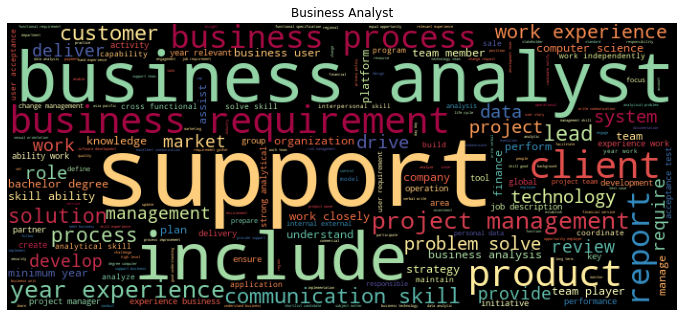

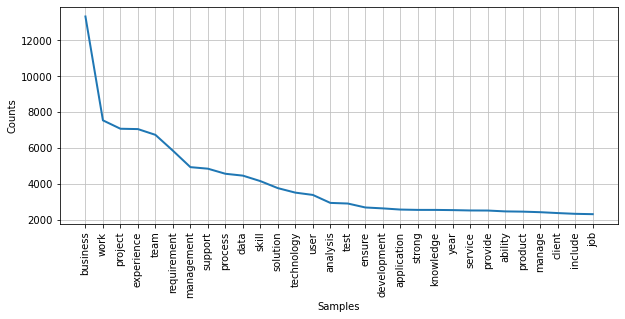

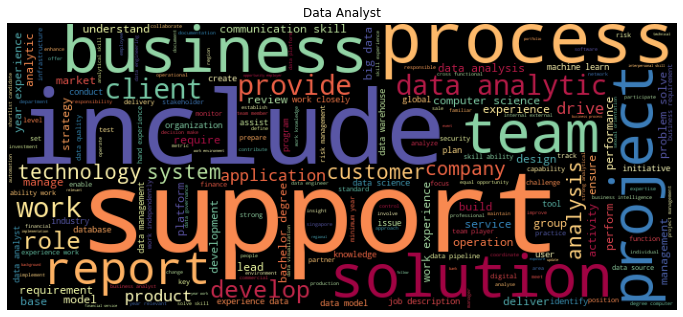

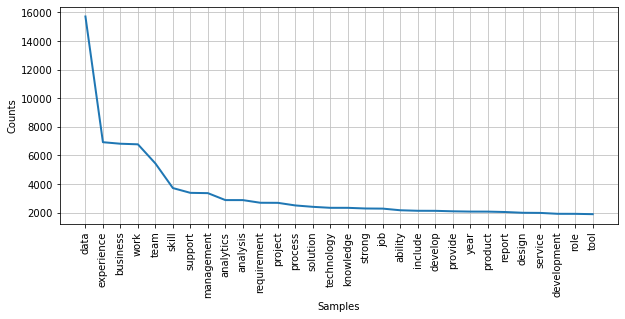

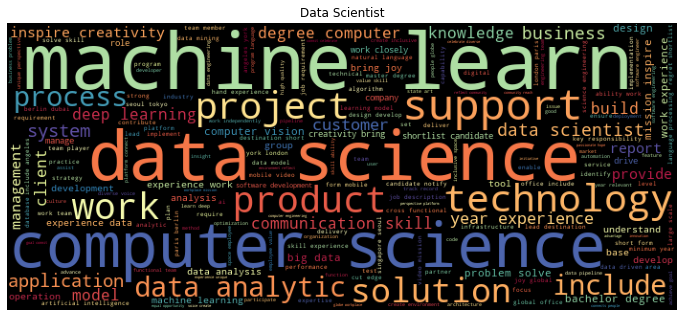

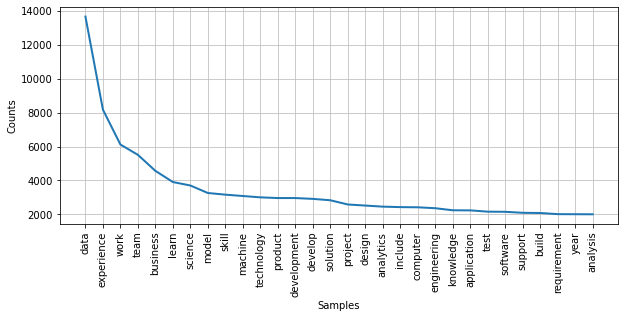

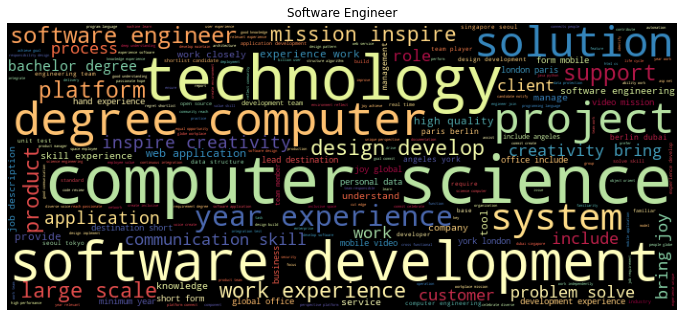

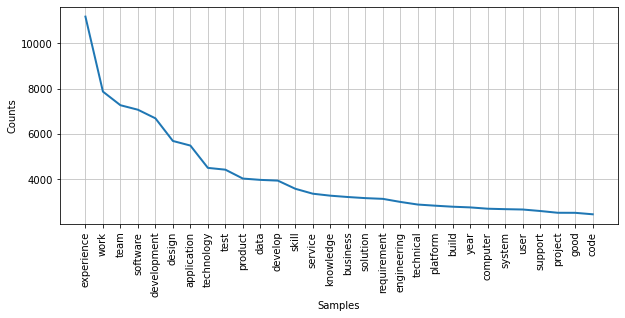

In [57]:
groupedRole = df.groupby('Role')

for name, role in groupedRole:
    # Concatenate all string into 1.
    text = role['lemmatized'].str.cat(sep=' ')
    all_clean_words = [word for sent in role['lemmatized'] for word in nltk.word_tokenize(sent)]
    words_frequency = nltk.FreqDist(all_clean_words)
    
    wordcloud = WordCloud(width=700, height=300, colormap='Spectral').generate(text)
    
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud)
    plt.title(name)
    plt.axis("off")
    plt.show()
    
    plt.figure(figsize = (10, 4), facecolor = None) 
    words_frequency.plot(30, cumulative=False)

### Cleaned CSV File

In [58]:
df.shape

(10191, 17)

In [59]:
df.to_csv('Dataset/Cleaned_Data.csv', index=False)

In [60]:
df.isna().any()

Role                       False
Description                False
encode_text                False
remove_backSlashN          False
remove_emoji_icon          False
lowercase                  False
remove_url                 False
remove_email               False
remove_text_number         False
expand_contraction         False
remove_punctuation         False
remove_stopwords           False
wrong_spelling             False
deep_spelling_cleansing    False
lemmatized                 False
len_before_cleaning        False
len_after_cleaning         False
dtype: bool

In [61]:
df['Description'][530]

' '